# Three-Electrode Pouch Data

Process Jason's 3-electrode pouch cell data. 

A Biologic was used to cycle the cells so we need to parse `.mpt` files.

7/25/2022

In [88]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib import gridspec as gridspec
import glob
import os

# Configure plot settings

In [72]:
plt.rc('font', **{'family'     : 'sans-serif',
                  'sans-serif' : ['Arial'],
                  'size': 18
                  })

plt.rc('figure', **{'autolayout' : True,
                    'figsize'    : (4.5, 4.5),
                    'facecolor'  : 'white',
                    'dpi'        : 100
                    })

plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')
plt.rc('axes',  labelsize='medium', grid=False)
plt.rc('axes',  titlesize='medium')
plt.rc('legend', fontsize='medium')

# Find the data

Only look for `.mpt` files. A bit of background: Biologic exports three types of files:

1. `.mpt` : raw text file output. It contains a header with the settings (schedule) information and a body which contains the raw data.
2. `.mps` : a settings (schedule) file
3. `.mpr` : a 'results' file

Only `.mpt` appears to be plaintext files. The other files are encrypted I think.

In [77]:
data_path = r'/mnt/g/My Drive/PCL_Andrew/project-formation-2/data/three-electrode-pouch/'

# Sort by file creation date
file_list = sorted(Path(data_path).glob("*.mpt"), key=os.path.getmtime)

In [78]:
[print(x.name) for x in file_list];

charge_RE_UMpouch_Feb22_3Elec3_CA1_CA3.mpt
charge_RE_UMpouch_Feb22_3Elec3_Cycle3_CA3.mpt
charge_RE_UMpouch_Feb22_3Elec3_Cycle4_CA3.mpt
charge_RE_UMpouch_Feb22_3Elec3_removed_limits_CA3.mpt
Formation_UMpouch_Feb22_3Elec_Charge_REF_CA1.mpt
Formation_UMpouch_Feb22_3Elec2_CA1.mpt
Formation_UMpouch_Feb22_3Elec2_cycle4_Cover20_CA1.mpt
Formation_UMpouch_Feb22_3Elec3_CA1_CA8.mpt
Formation_UMpouch_Feb22_3Elec3_Cycle2_CA8.mpt
Formation_UMpouch_Feb22_3Elec3_Cycle4_Cover20_CA8.mpt
Formation_UMpouch_Feb22_3Elec3_Cycle3_CA8.mpt


In [80]:
df_list = []

for file in file_list:
    
    # First read in the file to get the number of header lines
    df = pd.read_table(file, encoding='iso8859', on_bad_lines='skip')
    num_header_lines = int("".join(re.findall(r'\d', df.iloc[0][0]))) - 1
    
    # Read in the same file again, this time excluding the headers
    df = pd.read_table(file, encoding='iso8859', skiprows=num_header_lines)

    df_list.append(df)
    
    print(f'The file "{file.name}" contains {len(df.columns)} columns.')
    
    if 'Analog IN 1/V' in df.columns:
        print('Analog IN 1 is present in this file.')
        
    print ('')

The file "charge_RE_UMpouch_Feb22_3Elec3_CA1_CA3.mpt" contains 31 columns.

The file "charge_RE_UMpouch_Feb22_3Elec3_Cycle3_CA3.mpt" contains 31 columns.

The file "charge_RE_UMpouch_Feb22_3Elec3_Cycle4_CA3.mpt" contains 31 columns.

The file "charge_RE_UMpouch_Feb22_3Elec3_removed_limits_CA3.mpt" contains 31 columns.

The file "Formation_UMpouch_Feb22_3Elec_Charge_REF_CA1.mpt" contains 32 columns.
Analog IN 1 is present in this file.

The file "Formation_UMpouch_Feb22_3Elec2_CA1.mpt" contains 31 columns.

The file "Formation_UMpouch_Feb22_3Elec2_cycle4_Cover20_CA1.mpt" contains 32 columns.
Analog IN 1 is present in this file.

The file "Formation_UMpouch_Feb22_3Elec3_CA1_CA8.mpt" contains 31 columns.

The file "Formation_UMpouch_Feb22_3Elec3_Cycle2_CA8.mpt" contains 31 columns.

The file "Formation_UMpouch_Feb22_3Elec3_Cycle4_Cover20_CA8.mpt" contains 31 columns.

The file "Formation_UMpouch_Feb22_3Elec3_Cycle3_CA8.mpt" contains 32 columns.
Analog IN 1 is present in this file.



In [82]:
# Preview column names
for column in df_list[0].columns:
    print(column)

mode
ox/red
error
control changes
Ns changes
counter inc.
Ns
I Range
time/s
control/mA
Ecell/V
I/mA
dq/mA.h
(Q-Qo)/mA.h
|Energy|/W.h
Q charge/discharge/mA.h
half cycle
Temperature/°C
Energy charge/W.h
Energy discharge/W.h
Capacitance charge/µF
Capacitance discharge/µF
x
Q discharge/mA.h
Q charge/mA.h
Capacity/mA.h
Efficiency/%
cycle number
P/W
R/Ohm
Unnamed: 30


/home/wenga/git-repos/fast-formation/env-form/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


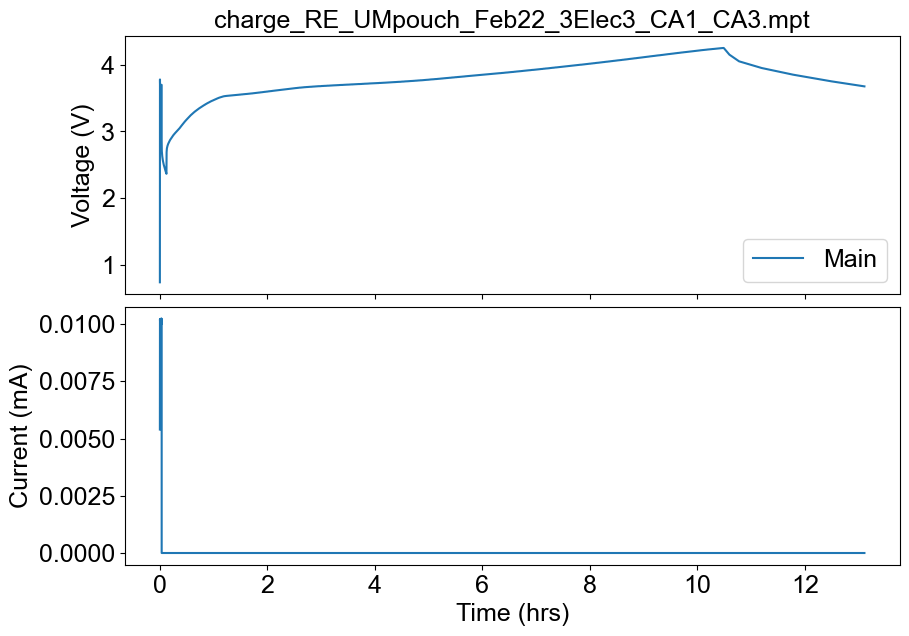

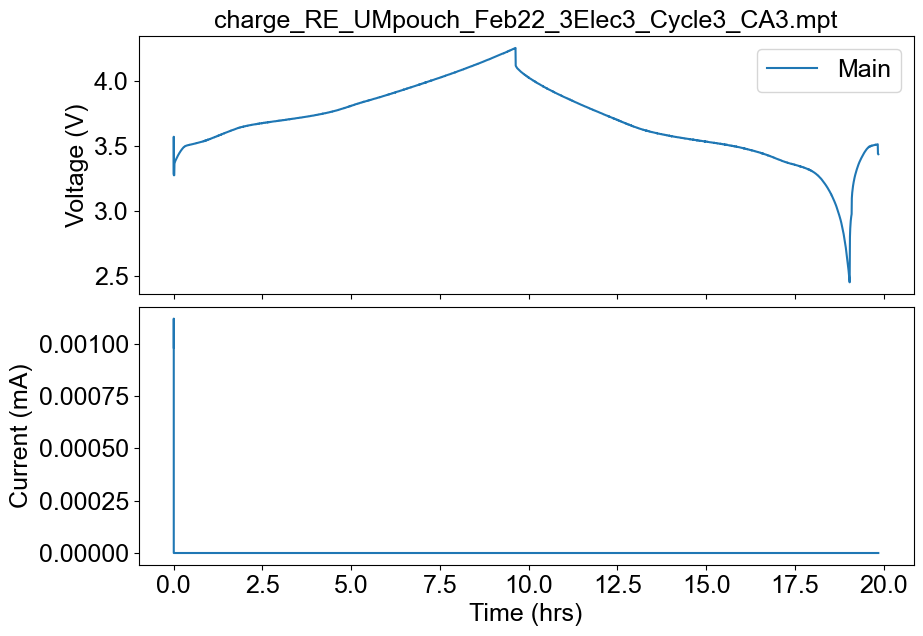

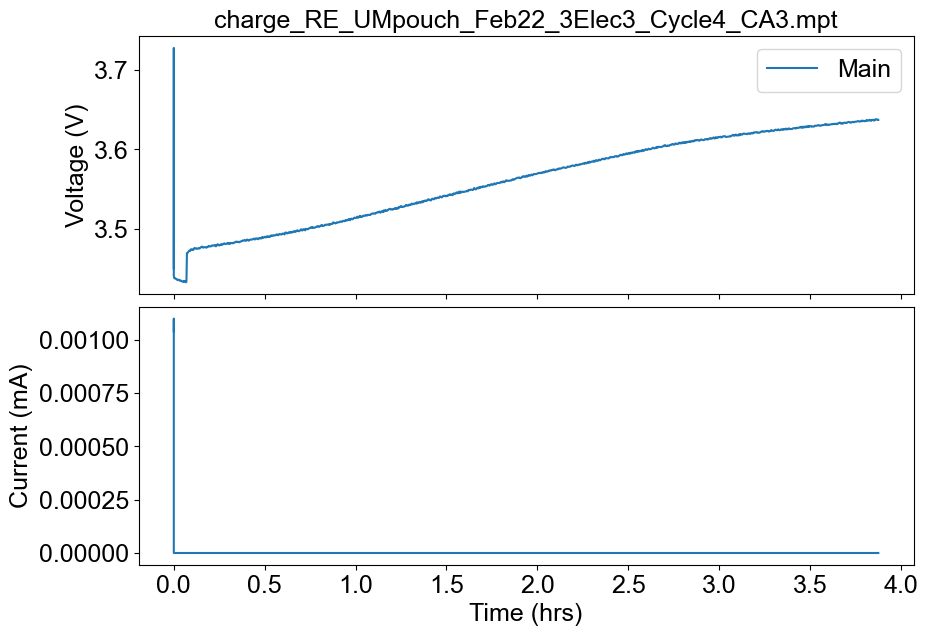

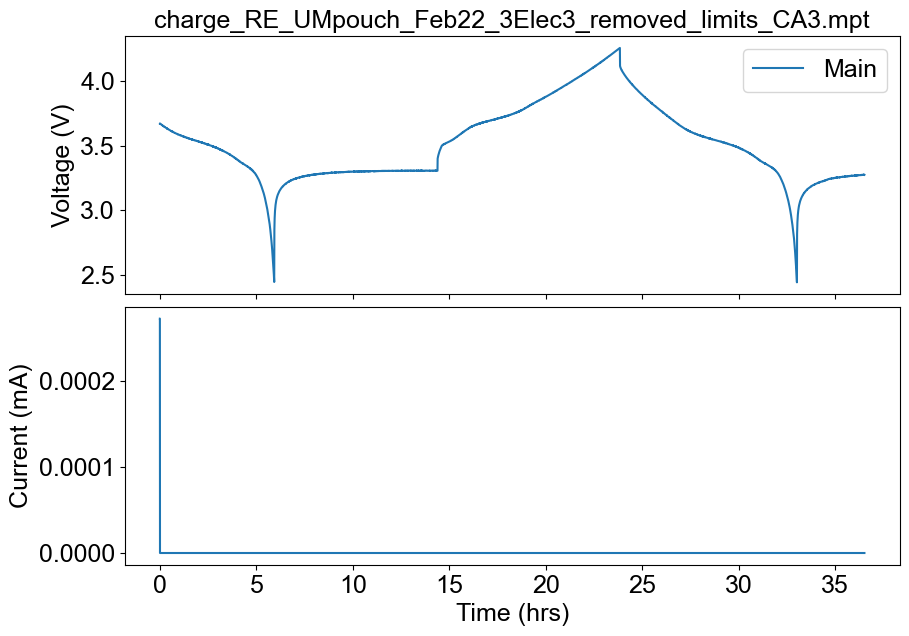

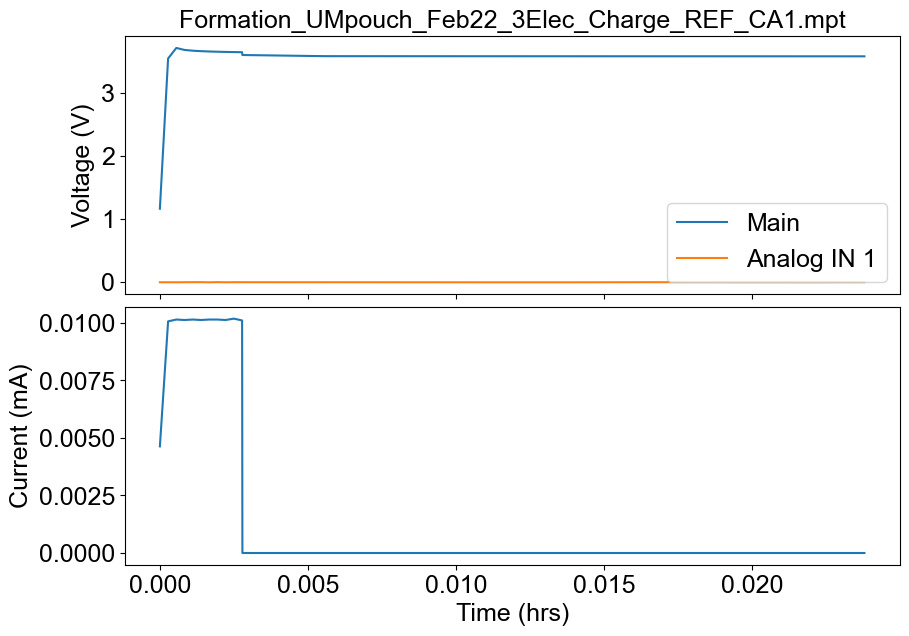

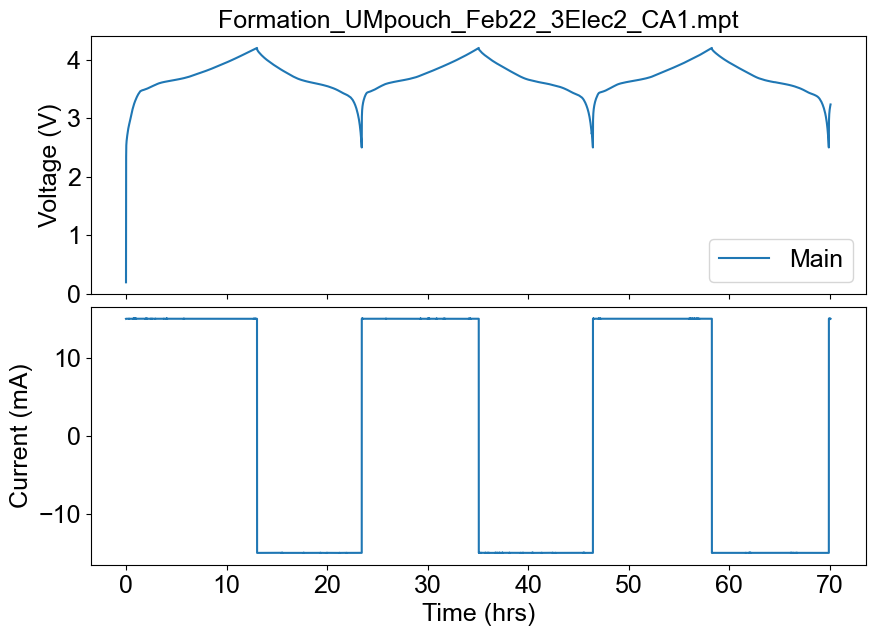

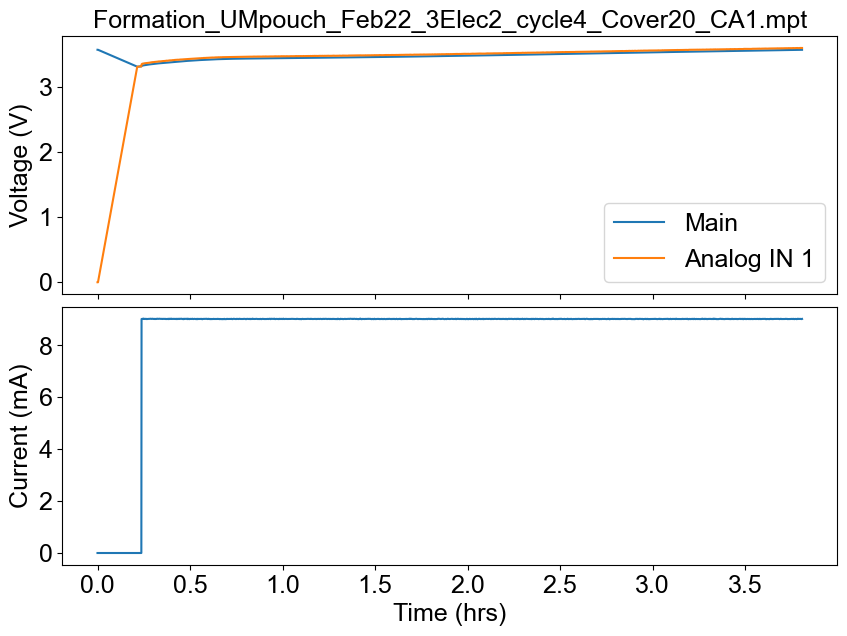

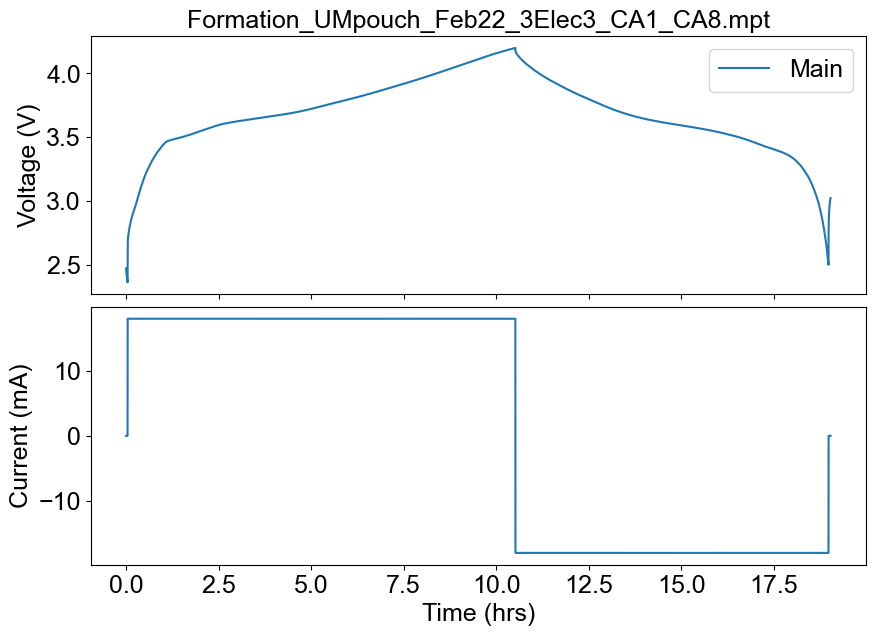

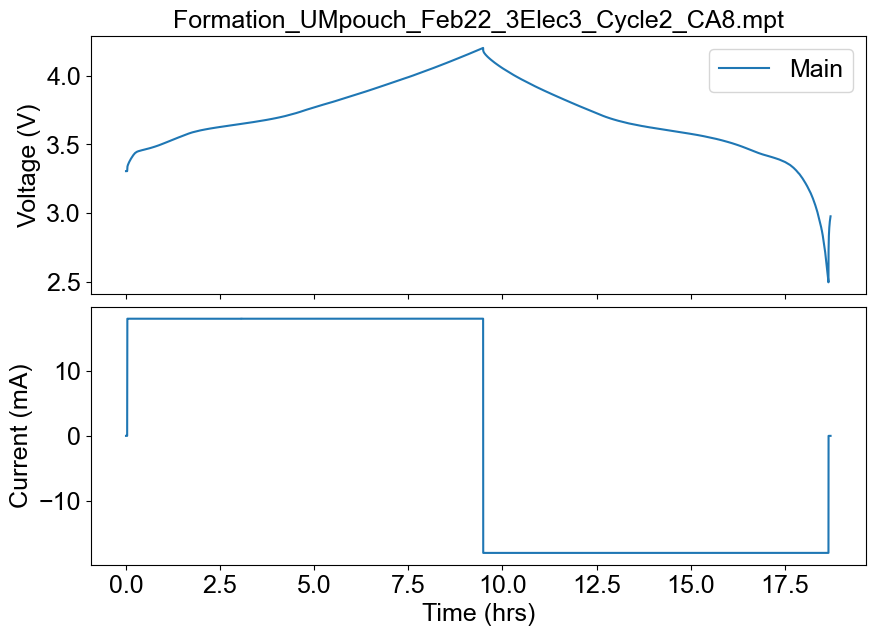

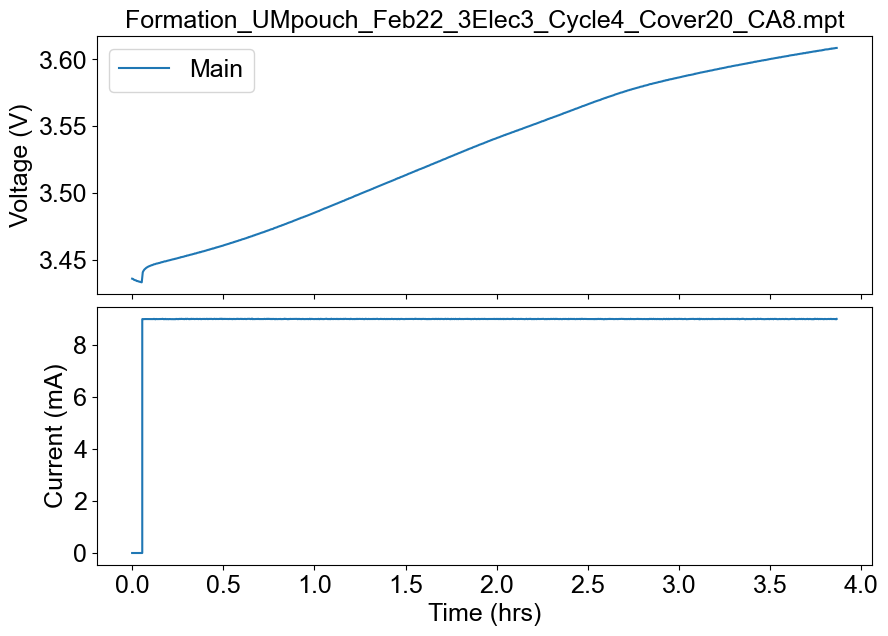

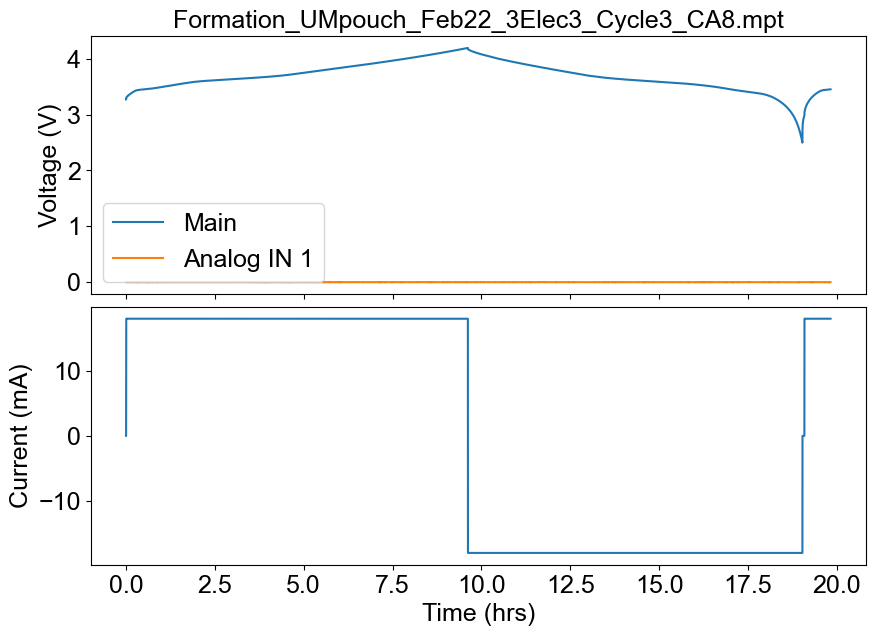

In [94]:
for file, df in zip(file_list, df_list):
    
    plt.figure(figsize=(10, 7))
    
    gs1 = gridspec.GridSpec(2, 1)
    gs1.update(wspace=0.025, hspace=0.05) # set the spacing between axe
    
    ax1 = plt.subplot(gs1[0])
    ax1.set_xticklabels([])
    
    plt.title(file.name)
    plt.plot(df['time/s']/3600, df['Ecell/V'], label='Main')
    if 'Analog IN 1/V' in df.columns:
        plt.plot(df['time/s']/3600, df['Analog IN 1/V'], label='Analog IN 1')
    plt.legend()
    plt.ylabel('Voltage (V)')    
    
    plt.subplot(gs1[1])
    plt.plot(df['time/s']/3600, df['I/mA'])
    plt.xlabel('Time (hrs)')
    plt.ylabel('Current (mA)')
    